# 7.4 DenseNet on CIFAR-10H

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Dataset import Dataset

# Calibration analysis

In [2]:
df = pd.read_csv('data/cifar_out.csv', header=0, index_col=0)
var='Median Reaction Time (s)'
df[var] = df['median_rt']
df = Dataset(df, k=10, cal_size=2000)

In [3]:
split = df.get_splits(var, max_depth=3, min_samples_leaf=int(len(df.df_cal)/10))

In [4]:
df.split_calibrate(var,split, how='dirichlet')

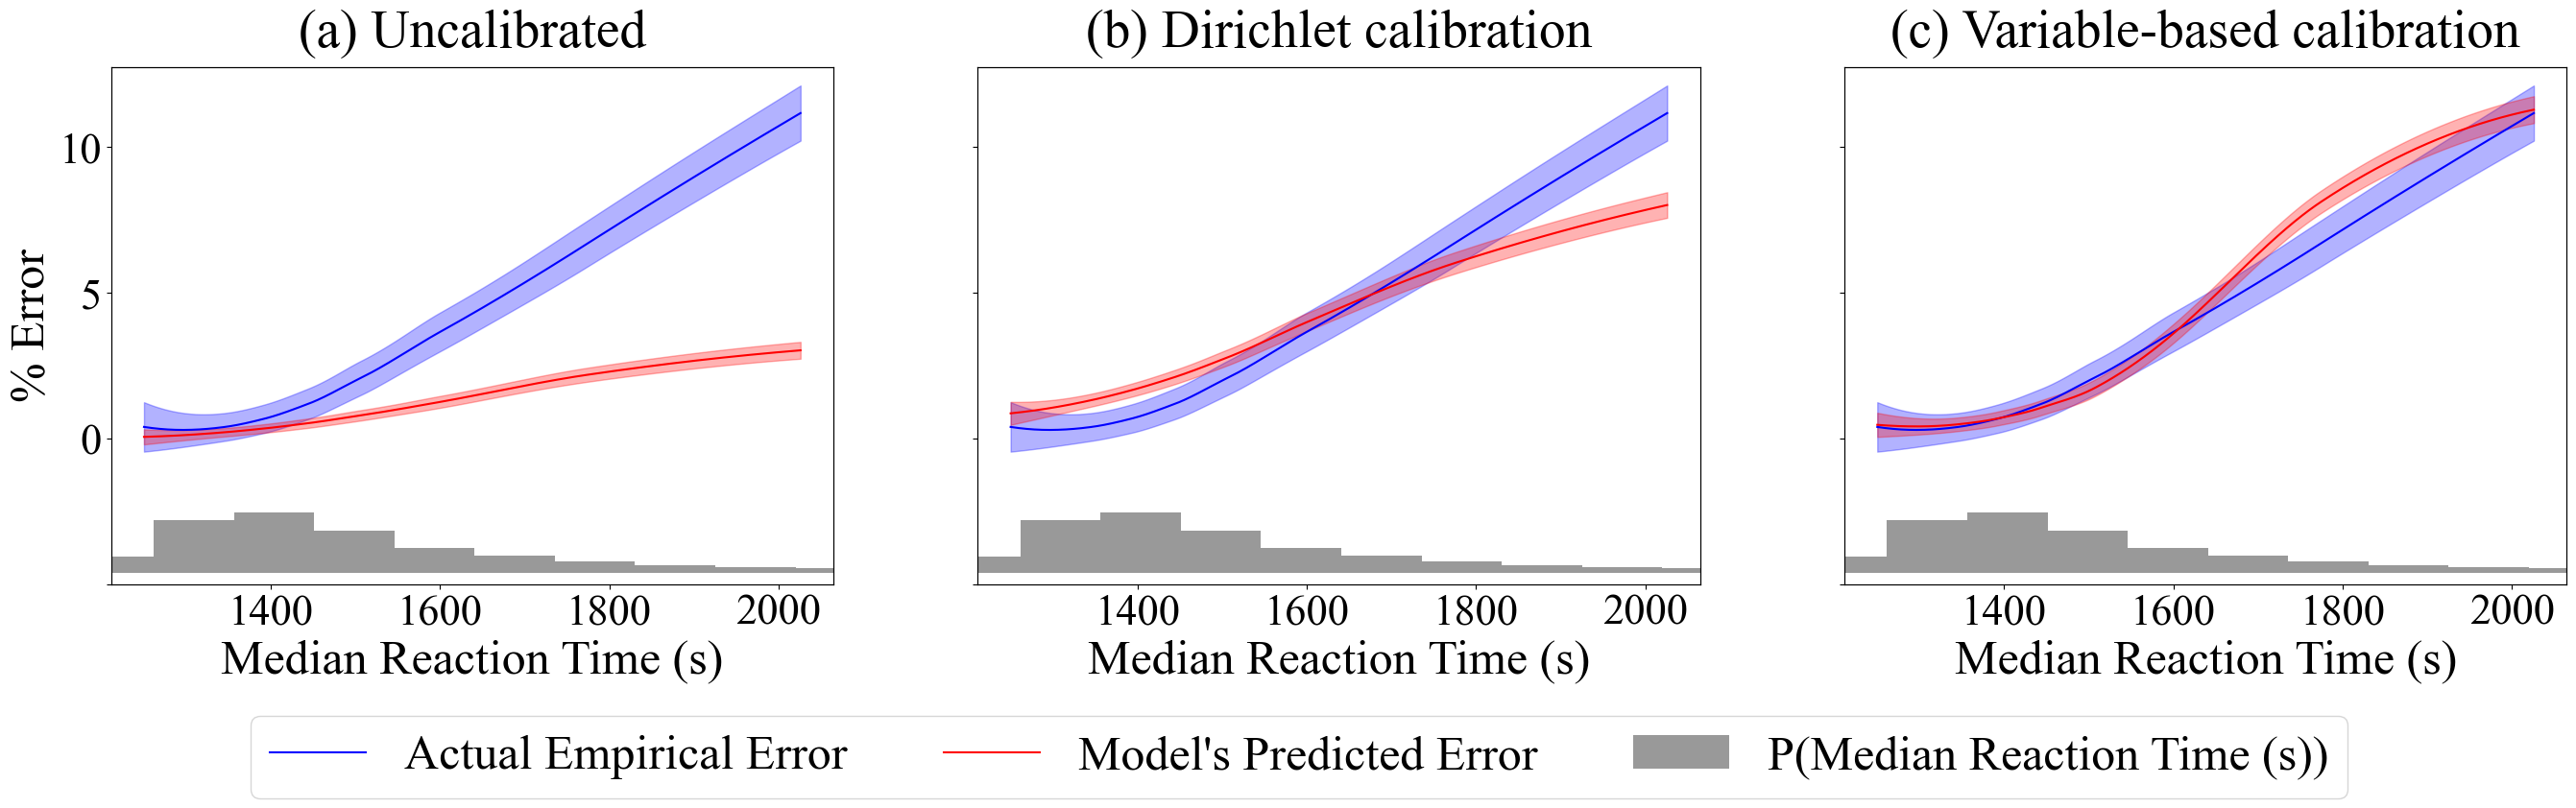

In [5]:
df.plot_compare(var=var, d=-0.0005, label2="_dirichlet", title2="Dirichlet calibration", filename='figs/cifar_comparison.png')

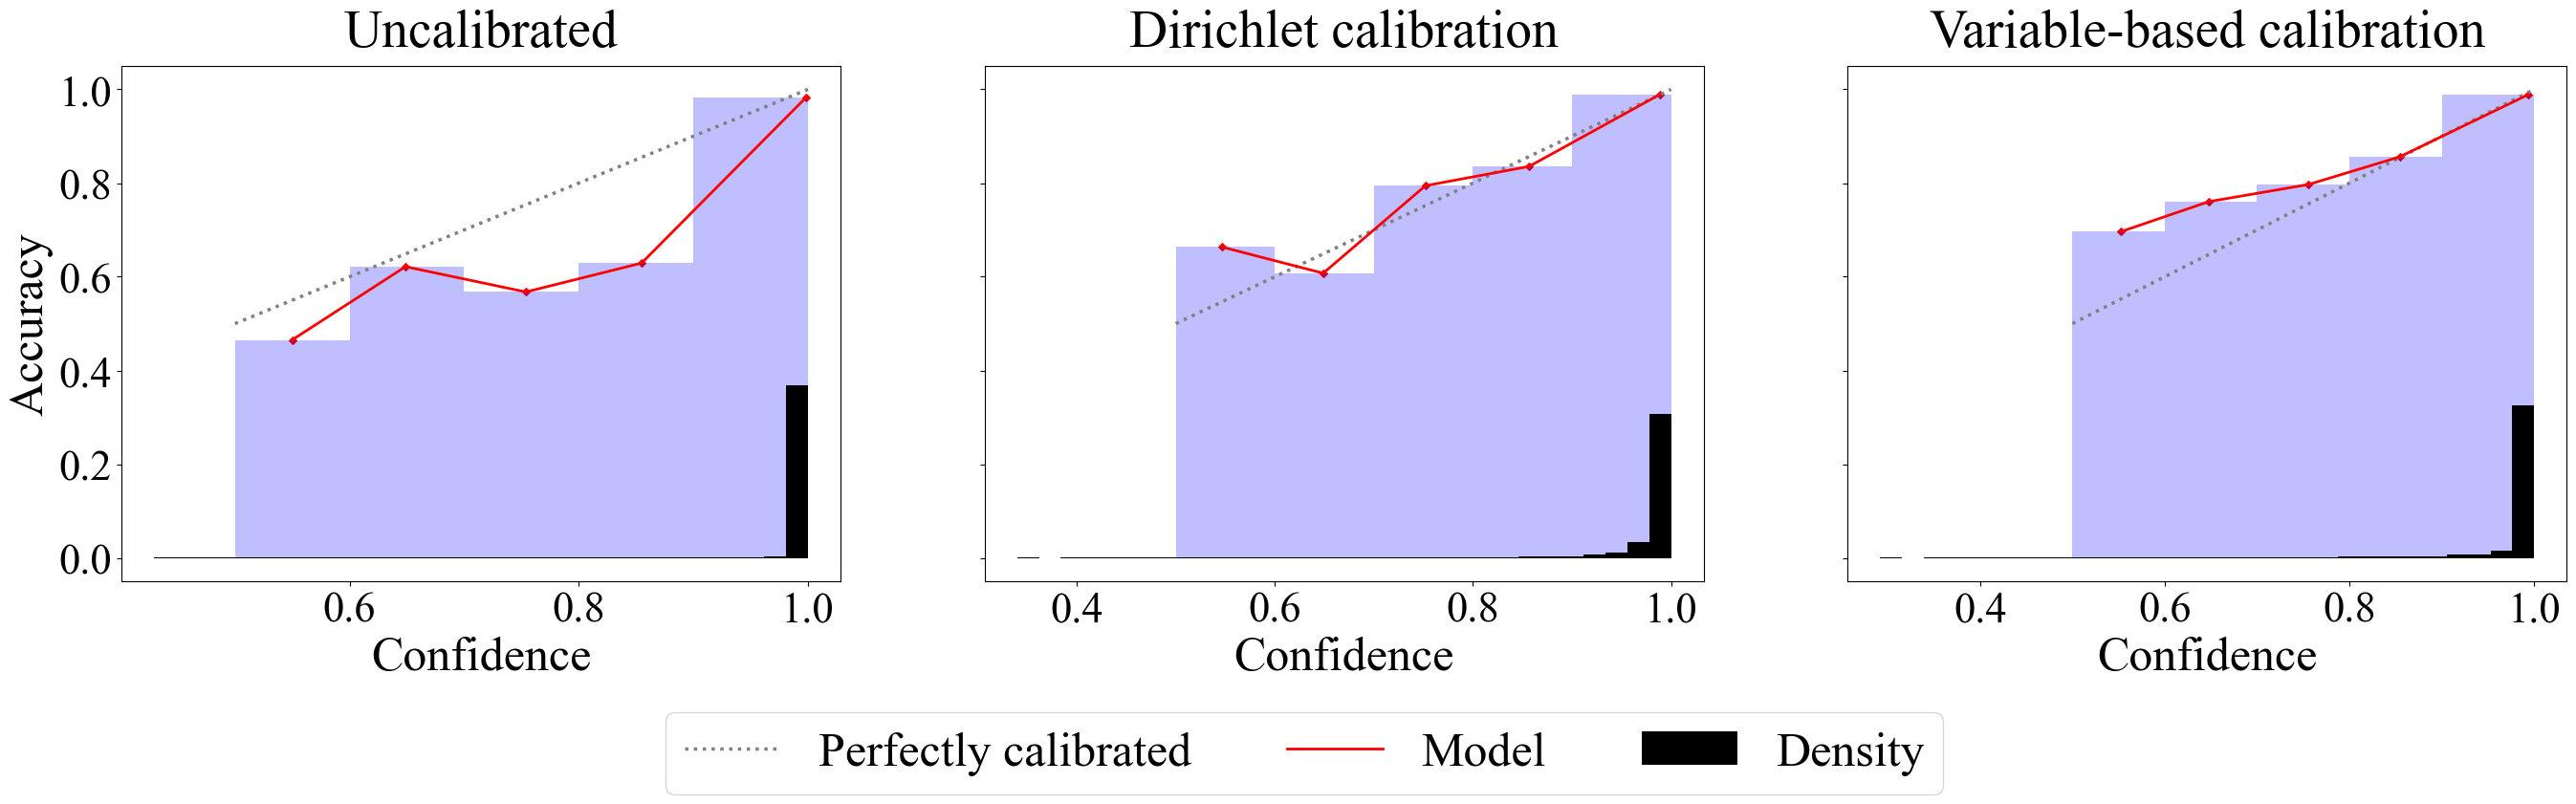

In [6]:
df.rd_compare(label2="_dirichlet", title2="Dirichlet calibration", filename='figs/cifar_reliability.png')

In [7]:
print('uncalibrated accuracy=',df.compute_accuracy())
print("Dirichlet calibrated accuracy=",df.compute_accuracy(label="_dirichlet"))
print("Variable-wise calibrated accuracy=",df.compute_accuracy(label="_split"))

uncalibrated accuracy= 0.9719325350843312
Dirichlet calibrated accuracy= 0.968971288785889
Variable-wise calibrated accuracy= 0.9591863010171238


In [8]:
bins=10

In [9]:
print("uncalibrated ECE=",df.compute_ECE(num_bins=bins))
print("Kumar calibrated ECE=",df.compute_ECE(label="_kumar", num_bins=bins))
print("Dirichlet calibrated ECE=", df.compute_ECE(label="_dirichlet", num_bins=bins))
print("Variable-wise calibrated ECE=",df.compute_ECE(label="_split", num_bins=bins))

uncalibrated ECE= 0.019001828564384413
Kumar calibrated ECE= 0.038268302141212435
Dirichlet calibrated ECE= 0.00788522273842585
Variable-wise calibrated ECE= 0.01179183436501638


In [10]:
print("uncalibrated VECE =",df.compute_VECE(var=var, num_bins=bins))
print("Kumar calibrated VECE =",df.compute_VECE(label="_kumar",var=var, num_bins=bins))
print("Dirichlet calibrated VECE =",df.compute_VECE(label="_dirichlet",var=var, num_bins=bins))
print("Variable-wise calibrated VECE =",df.compute_VECE(label="_split",var=var, num_bins=bins))

uncalibrated VECE = 0.019190431212893905
Kumar calibrated VECE = 0.03596244205491177
Dirichlet calibrated VECE = 0.011205297090148118
Variable-wise calibrated VECE = 0.008624956755133554
